In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("kc_house_data.csv")
print("Initial Shape:", df.shape)

Initial Shape: (21613, 21)


In [ ]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
df['house_age'] = 2025 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['bed_bath'] = df['bedrooms'] * df['bathrooms']

In [ ]:
df['age_category'] = pd.cut(df['house_age'], bins=[0, 10, 30, 100], labels=['New', 'Medium', 'Old'])


In [ ]:
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['zipcode', 'age_category'], drop_first=True)


In [ ]:
scaler = StandardScaler()
scaled_features = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors']
df[scaled_features] = scaler.fit_transform(df[scaled_features])



In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²   :", r2_score(y_true, y_pred))

In [ ]:
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest Regressor")


Linear Regression Performance:
MAE : 68053.74799213852
MSE : 15436935090.106157
RMSE: 124245.46305642776
R²   : 0.8978881412377983

Random Forest Regressor Performance:
MAE : 6075.008595882488
MSE : 901531198.851914
RMSE: 30025.509135598586
R²   : 0.9940365735873382


**Correlation** **Heatmap**

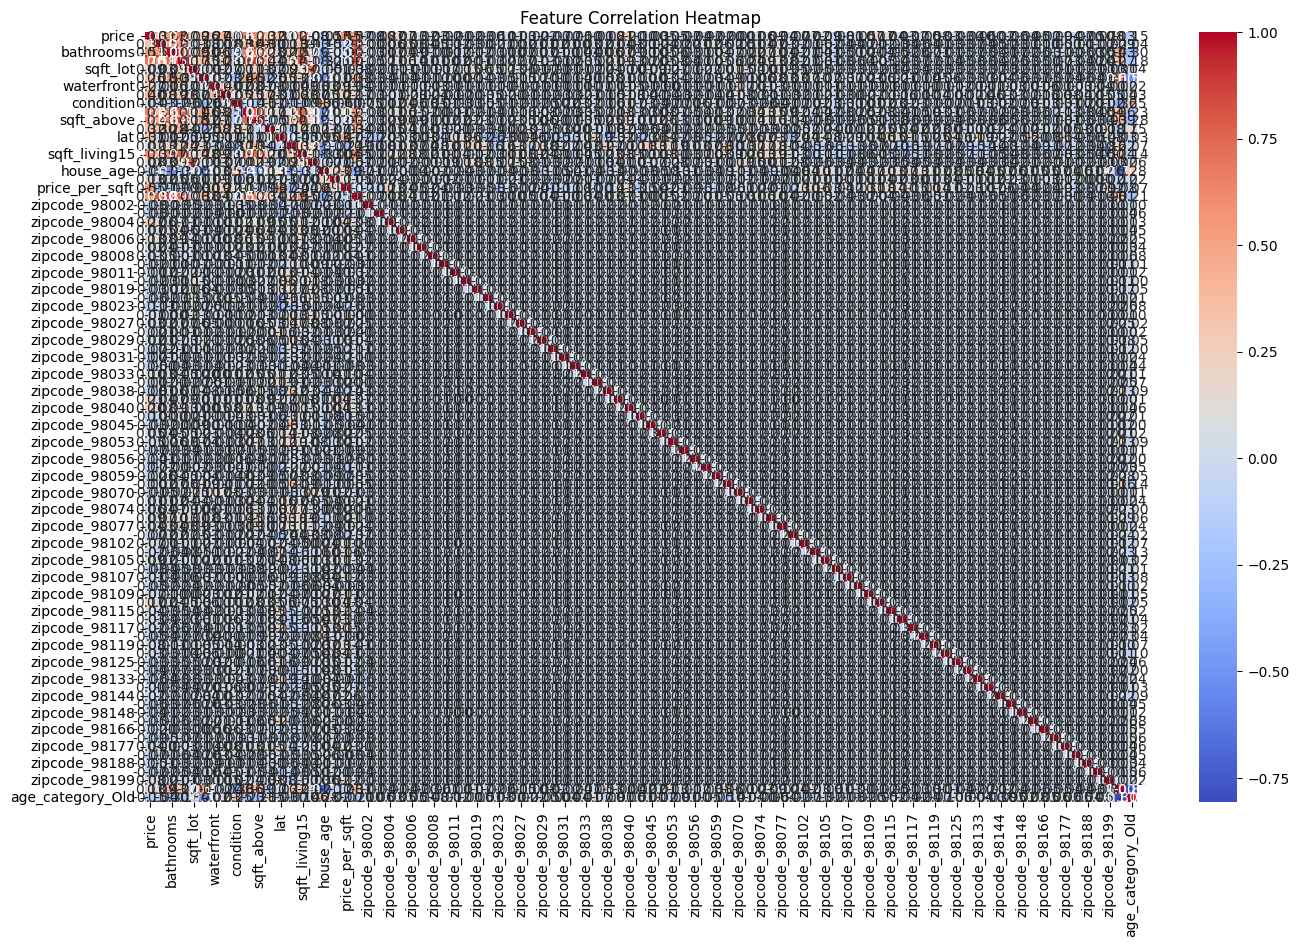

In [ ]:
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**House** **Price** **Distribution**

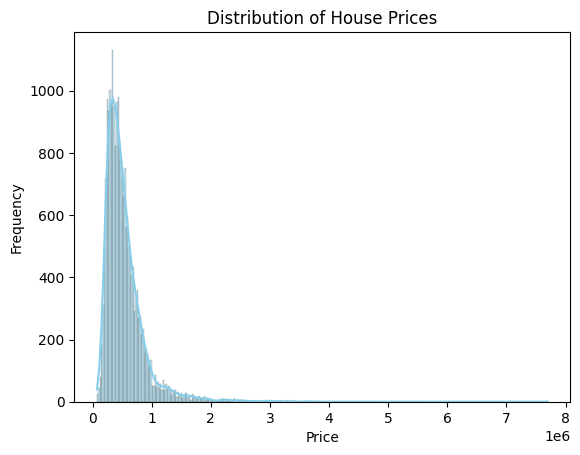

In [ ]:
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Boxplot** **–** **Price** **by** **Bedrooms**

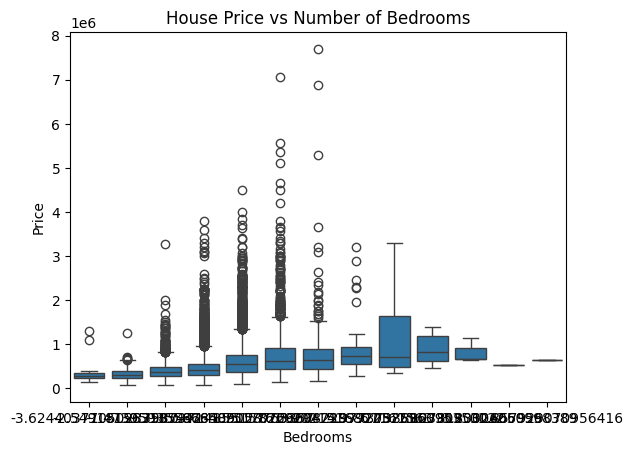

In [ ]:
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title("House Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

**Scatter** **Plot** **–** **Price** **vs** **Square** **Foot**

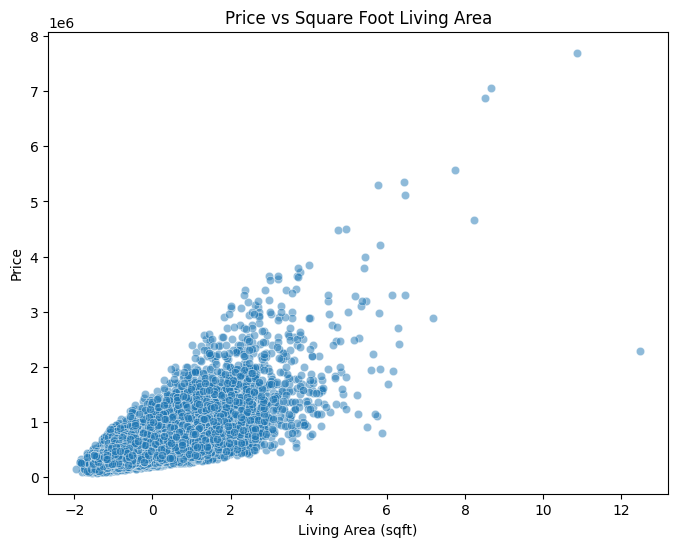

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5)
plt.title("Price vs Square Foot Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.show()